# How can you teach a computer to recognize a number? Or characters? Cell phone numbers? Signs?
## Or: How do neural networks work?




In this article, I will try to show you or give you an understanding of how an artificial neural network works. Because the topic is very extensive, I wanted to include a common thread. I will use an example, the red thread, to guide me through the topic.

We will look at the **Hello world** of machine learning: The **MNIST** dataset.

### **The MNIST data set**

The MNIST dataset is a well-known collection of handwritten digits that is of great importance for the development of character recognition and image processing algorithms. In this chapter, I will explore the MNIST dataset in more detail and show how to train neural networks to recognize handwritten digits.

I will accompany all of this *live* with Python code.
At the end I will show you a small Python application in which you can write digits with the mouse and read the classification by the neural network.

A quick note on the Python code. This is all much more elegant and efficient. However, I believe that the following code is easier to understand for non-programmers.

First, we make a few imports. In Python, imports make it possible to access existing code libraries instead of having to write everything from scratch. This saves time and allows me to fall back on proven and tested functions.

In [2]:
# Necessary Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import random
import numpy as np

Then we set a few seeds. Seeds are used in machine learning to control the randomness in the algorithms and to achieve reproducible results. It is advisable to try out different seeds to ensure the robustness of the model.

In [3]:
# Set seeds to make results reproduceable
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

The MNIST dataset, which consists of handwritten digits, is already stored in Keras. There is a load function in Keras with which you can simply load this data set into your model. I am making use of this here.

In [4]:
# Load Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

This is followed by a code block that displays the first 20 images of the data set.

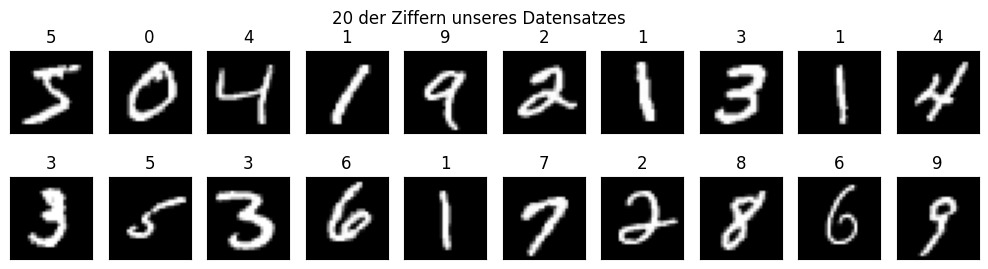

In [5]:
# Plot some (20) of the digits
fig = plt.figure(figsize=(12.5, 3))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  ax.imshow(x_train[idx], cmap="gray")
  ax.set_title(str(y_train[idx]))

fig.suptitle("20 der Ziffern unseres Datensatzes")
plt.show()

#### Overview of the MNIST data set

The MNIST dataset consists of a total of **70,000** images of handwritten digits. Of these, **60,000** images are for training and **10,000** images are for testing. The images are **black and white** and have a size of **28x28** pixels.

The dataset was created in the 1990s by Yann LeCun, Corinna Cortes and Christopher J.C. Burges at the Courant Institute of Mathematical Sciences at New York University. It was developed to train and test algorithms for recognizing handwritten digits.

The handwritten digits in the dataset come from a large number of people and were written on standard forms. The digits are arranged in a random order and have no special features or patterns that could influence the recognition.

The dataset is a standard benchmark dataset and is often used to compare the performance of machine learning algorithms. The MNIST dataset is a simple and easily available dataset, which is why it is often used in tutorials, trainings or similar. The **hello world** of machine learning.

First, we take a closer look at a single image. To do this, we select one at random and plot it. Firstly, the image as such, and secondly, how it is stored in memory and how computers use it, as numbers.

Label des zufällig gewählten Bildes: 4


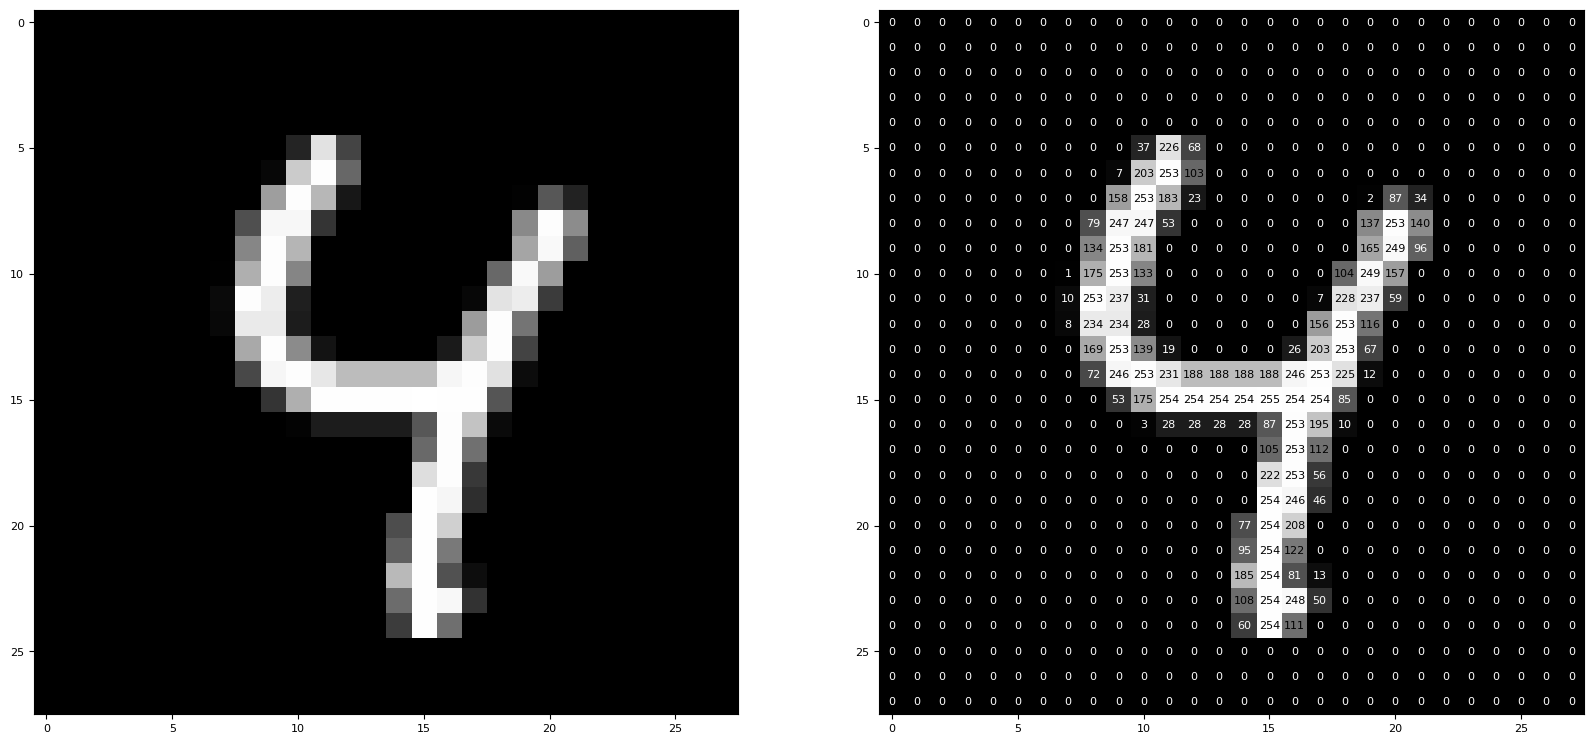

In [6]:
# Show a random image
plt.rcParams.update({'font.size':8})

rnd = random.randint(0, random.randint(0, len(x_train)))
img = x_train[rnd]
ground_truth = y_train[rnd]

plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")

fig = plt.subplot(1,2,2)
fig.imshow(img, cmap="gray")
width, heigth = img.shape
thrs = img.max()/2.5
for x in range(width):
  for y in range(heigth):
    val = round(img[x][y], 2) if img[x][y] != 0 else 0
    fig.annotate(str(val), xy = (y, x),
                horizontalalignment = "center",
                verticalalignment = "center",
                color = "white" if img[x][y] < thrs else "black")

print(f"Label des zufällig gewählten Bildes: {ground_truth}")

The random image of the data set has the aforementioned 28x28 pixels and is stored in grayscale. It is shown as an image on the left.
The individual values of the gray levels, i.e. the numbers representing each pixel, are shown in the output on the right. These are originally values between 0 and 255, i.e. 8 bits per pixel.  The value indicates how bright this pixel is.

These numerical values are those that are fed into the input layer that is still to be described.

#### **Feature Maps**




While the above image of the MNIST dataset has one feature map, the grayscale values, the situation is different for color images. Colored images have a separate feature map for each color channel: Red, Green, Blue. When recognizing digits, we can of course dispense with the colour channels. Gray value levels are sufficient.

<figure>
  <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*xGj2NQwOpsLpx1Ji.png", width="600">
  <figcaption>The three feature maps of an RGB image. Usually 8 bits per channel are used, which results in a total of $2^8 \cdot 2^8 \cdot 2^8 = 16,777,216$ possible colors. </figcaption>
</figure>



### **The neural network**

Back to our example: So we have $28 * 28 = 784$ pixels, each with a value. And these 784 pixels need to be analyzed. Our brain has learned to link these pixels together in such a way that we can easily recognize the number. We still have to teach the neural network how to do this.

So we take these $784$ pixels as input for our neural network. As an output, it is clear from the task that we need $10$ outputs, the digits $0$ to $9$.
We refer to the inputs or input layer as the input layer and the outputs as the output layer. Everything in between are so-called hidden layers. Here it is already clear that our neural network can only be used sensibly for this task.

We transform the input matrix of $28 * 28$ pixels into a tensor of size $784$ for easier handling. We then have $784$ pixels or inputs arranged in a row, which in turn are connected to each neuron in the following layer. Each of these neurons is in turn connected to each neuron in the following layer, up to the output layer. This architecture is the so-called **multilayer perceptron**.
There are other architectures where this is not the case, but more on this later.

<figure>
  <img src="https://tikz.net/wp-content/uploads/2021/12/neural_networks-002.png", alt="", width="500">
  <figcaption>Feedforward network or multilayer perceptron. <a href="https://tikz.net/wp-content/uploads/2021/12/neural_networks-002.png">Image source</a></figcaption>
</figure>

The term **neuron** has now been used so often that we should take a closer look at it.

##### **The Neuron**

The neuron is a simple artificial neural network (ANN) that was developed in the early days of artificial intelligence (AI). It is a fundamental concept for machine learning and is often used as an introduction to the topic of deep neural networks (DNNs).

<figure>
  <img src="https://tikz.net/wp-content/uploads/2023/12/neural_networks-009.png" alt="Ein Neuron mit Eingabevektor, Bias, Aktivierungsfunktion und Ausgabe", width="700">
  <figcaption>A neuron with input vector, bias, activation function and output.  <a href="https://tikz.net/wp-content/uploads/2023/12/neural_networks-009.png">Image source</a>
</figure>

A neuron consists of an input vector $a_i$, a weighting vector $w_i$, an offset or bias $b$ and an activation function $\sigma$. Each input value is assigned a weight, which determines the influence of the respective value on the output of the neuron. The sum of all weighted input values is then transferred by the activation function, which decides whether and how the neuron is "activated" or not. A detailed look at different activation functions is also included in this article. A brief overview can be found in this image. The abscissa represents the value that flows into the activation function and the ordinate the corresponding activation.

<figure>
  <img src="https://www.researchgate.net/profile/Max-Pritzkoleit/publication/335490710/figure/fig1/AS:797522956124160@1567155698415/Abbildung-4-Gaengige-Aktivierungsfunktionen-f-Akt-fuer-die-Verwendung-in-KNN.png" alt="Drei Aktivierungsfunktionen: Sigmoid, tanh und ReLU", width="500">
  <figcaption>Three of the most common activation functions: Sigmoid, tanh and ReLU.</figcaption>
</figure>

The neuron can be trained for a variety of tasks, including classification and regression. In the case of classification, the neuron is trained to categorize an input into one of several predefined categories. In the case of regression, the neuron is trained to predict a continuous output based on an input.

Training a neuron essentially consists of adjusting the weights to improve the prediction accuracy of the model. This is done by using an optimization algorithm such as gradient descent, which updates the weights during backpropagation based on the errors the neuron makes in the prediction.

We therefore have $784$ of these neurons in the input layer and $10$ in the output layer. For a better result or faster training, the values of the inputs are scaled. Non-generic reasons for this are:

* **Better convergence**: Scaling the inputs to a similar range of values can improve the convergence of the training process. If the inputs have very different value ranges, this can lead to some weights in the network being updated faster than others. This can lead to slower convergence or even stuck training. By scaling the inputs, these problems can be reduced.

* **Avoidance of numerical instability**: In neural networks, mathematical operations such as calculating activation functions or weight updating are often performed. If the inputs have large values, these operations can lead to numerical instability, e.g. due to overflow or underflow. By scaling the inputs to a smaller value range, such problems can be avoided.


* **Better interpretability**: Scaled inputs can also lead to better interpretability of the results. When the inputs are scaled to a certain range of values, the weights in the network can be directly related to the meaning of the input variables. This can help to better understand the impact of the inputs on the predictions of the model.

The input vector then looks like this:

In [7]:
print(f"Form von x_train vor dem Reshaping: {x_train.shape}\n"
      f"Maximaler Wert eines Eintrages: {x_train[rnd].max()}\n"
      f"Form eines einzelnen Bildes/Eingabevektors: {x_train[rnd].shape}")

x_train = x_train.reshape((-1, 28 * 28)).astype("float32") / 255
x_test = x_test.reshape((-1, 28 * 28)).astype("float32") / 255

print(f"Form der Daten nach dem Reshaping: {x_train.shape}\n"
      f"Maximaler Wert eines Eintrages: {x_train[rnd].max()}\n")

Form von x_train vor dem Reshaping: (60000, 28, 28)
Maximaler Wert eines Eintrages: 255
Form eines einzelnen Bildes/Eingabevektors: (28, 28)
Form der Daten nach dem Reshaping: (60000, 784)
Maximaler Wert eines Eintrages: 1.0



##### **One-Hot-encoding**

Next, I perform **one-hot coding**. One-hot encoding is a technique for representing categories as binary vectors. Each category is given a vector, with one position representing the category and all other positions containing zeros. This encoding is often used in machine learning modeling. With our handwritten digits, each digit would be assigned a unique category. For example, a $0$ could be encoded as $[1, 0, 0, 0, 0, 0, 0, 0, 0]$, while a $1$ would be encoded as $[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]$, and so on.

Particularly in the case of classification samples - as here with the MNIST data set - the output variables should be converted into a suitable form so that they can be used in the model. By using one-hot encoding, the output variables can be used more efficiently with the model, as they can be represented as numerical values. This facilitates the calculations and training of the model.

In [8]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print(f"One-hot-kodiertes Label: \n{y_train[rnd]}\n"
      f"Ground Truth / Label: {ground_truth}")

One-hot-kodiertes Label: 
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Ground Truth / Label: 4


#### **Structure of the neural network**

Now let's move on to the actual neural network. Let's start with the implementation.

First, we define a so-called early stopping callback. Early stopping is a method in machine learning where the training of a model is stopped early to avoid overfitting, based on the observation of validation errors during each epoch.

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

Next comes the model. I use a sequential model here.
A sequential model in TensorFlow is a linear stacking of layers or (hidden) layers that are executed one after the other. It enables the construction and training of neural networks for different tasks in machine learning by using different types of layers.

Let's define the sizes of the individual layers. We specify the number of neurons required.

In [10]:
input_layer_size = 28 * 28
first_layer_size = 256
second_layer_size = 128
output_layer_size = 10

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(first_layer_size, activation="relu", input_shape=(input_layer_size,)), # Inputlayer und erstes hidden layer
    tf.keras.layers.Dense(second_layer_size, activation="relu"), # zweites hidden layer
    tf.keras.layers.Dense(output_layer_size, activation="softmax") # output-layer
])

The model must then be compiled. Various parameters can be passed here. I will limit myself here to the optimizer, the loss and the metrics. A brief description:
* **Optimizer**: An optimizer is an algorithm that adjusts the weights of a neural network to minimize the error.
* **Loss**: Loss is a function that measures the error between the model's predictions and the actual values.
* **Metrics**: Metrics are measures to evaluate the performance of a model, e.g. accuracy or F1 score.

Usually also passes a learning rate which is used to adjust the weights during backpropagation. The Adam optimizer used makes this step superfluous:
* The Adam optimizer is an optimization algorithm that uses an adaptive learning rate. In contrast to other optimizers such as the gradient descent method, where a fixed learning rate must be specified, the Adam optimizer automatically adapts the learning rate to the data. It calculates and updates the learning rate based on the moments of the gradients. This eliminates the need to pass a fixed learning rate to the Adam optimizer.

I have written a more detailed description later in this article.

In [12]:
# Kompilieren des Modells
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

And now let's output some information about our neural network.

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


So we have around $200000$ parameters that need to be adjusted during training. This is by no means a particularly large network, which sometimes have parameters in the $9$-digit range, but still too many to adjust the network (several times) by hand and hopefully enough parameters to be able to recognize the digits.

In [14]:
# Training des Modells
history = model.fit(x_train, y_train, epochs=50, batch_size=128, callbacks=[callback], validation_split=0.2, verbose=0)

The training is now carried out in the above step. Here, too, some parameters are passed:
* **epochs**: An epoch is an iteration over the entire training dataset during the training process of a model. By running through several epochs, the model can access the entire training data set several times and adjust its weights accordingly in order to achieve better performance.
* **Batch Size**: The Batch Size indicates how many training examples are processed simultaneously in one step. The batch size influences how many training examples are processed simultaneously. A larger batch size can speed up the training, while a smaller batch size can enable a more accurate update of the weights.
* **Validation split**: During training, the validation-training split is used to monitor the progress of the model and avoid overfitting. A portion of the training data is split off as validation data and used separately to evaluate the model's performance on unknown data and adjust hyperparameters.

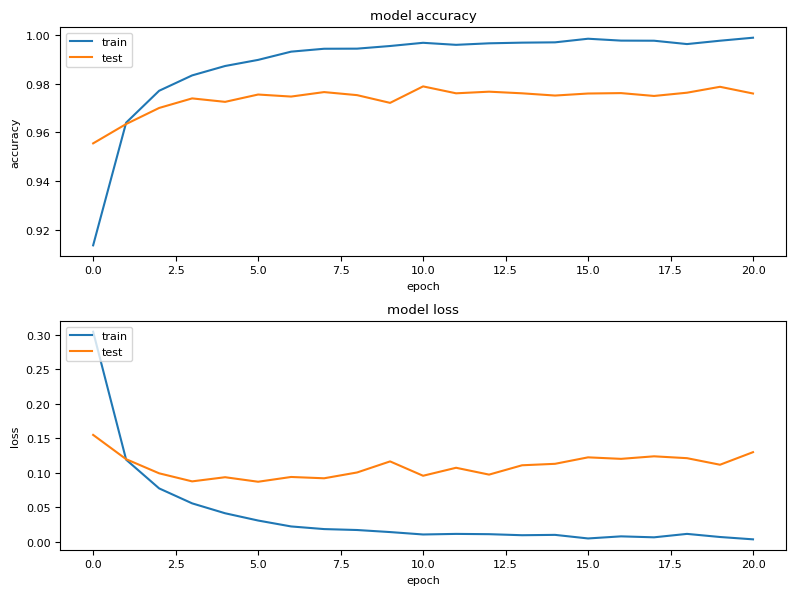

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot 1
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# Plot 2
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

plt.tight_layout()
plt.show()

The plot above now shows the accuracy and loss of training and validation after each epoch. These curves show the general performance. However, more specific information can also be derived. If, for example, the accuracy of the training is very good but that of the validation is not, the model is probably overfitted. If both accuracies are poor, it is underfitted. More on this shortly.

If we feel that the training of our network was sufficient, we can test the performance on previously unseen material.

In [16]:
# Bewertung des Modells
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1113 - accuracy: 0.9774
Test accuracy: 0.977400004863739


We obtain an accuracy of $98.1\% $ with the above neural network. For comparison, the best models achieve accuracies of over $99.8\%$.

A slightly different comparison to narrow it down. Assuming that the digits were equally distributed in the data set, i.e. each digit had a probability of $10\%$, and my model would say for each digit that it is not $5$, then the model would be right in $90\%$ of cases. Of course, this comparison is a little flawed.


Now the above model may have an overfitting problem because it achieves almost $100\%$ accuracy during training, but the accuracy in validation cannot keep up. Therefore, I am now trying to improve the result with a so-called dropout layer.

##### **Underfitting, Overfitting and Dropout**
Underfitting and overfitting are problems that can occur when training machine learning models. Underfitting occurs when the model is not able to capture the training data well, while overfitting occurs when the model is too strongly adapted to the training data and does not generalize well to new data.

<figure>
  <img src="https://tikz.net/janosh/dropout.png", width="700">
  <figcaption>Dropout in various hidden layers. <a href="https://tikz.net/dropout/">Image source</a>
</figure>


There are various techniques to prevent overfitting. One of these is the so-called dropout.
During training, neurons are randomly deactivated by setting their outputs
or weights are set to zero. This reduces redundancy and makes the model more robust. Dropout helps to improve the generalization ability of the model and improves performance on new data.

It is implemented quite quickly. I can simply add a layer to the sequential model and recompile it. I tell the layer that it should drop $20\%$ of the neurons. This happens randomly with every training run.
Then we restart the training with the modified model.

In [17]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(first_layer_size, activation="relu", input_shape=(input_layer_size,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(second_layer_size, activation="relu"),
    tf.keras.layers.Dense(output_layer_size, activation="softmax")
])

In [18]:
# Kompilieren des Modells
model2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
# Training des Modells
history = model2.fit(x_train, y_train, epochs=50, batch_size=128, callbacks=[callback], validation_split=0.2, verbose=0)

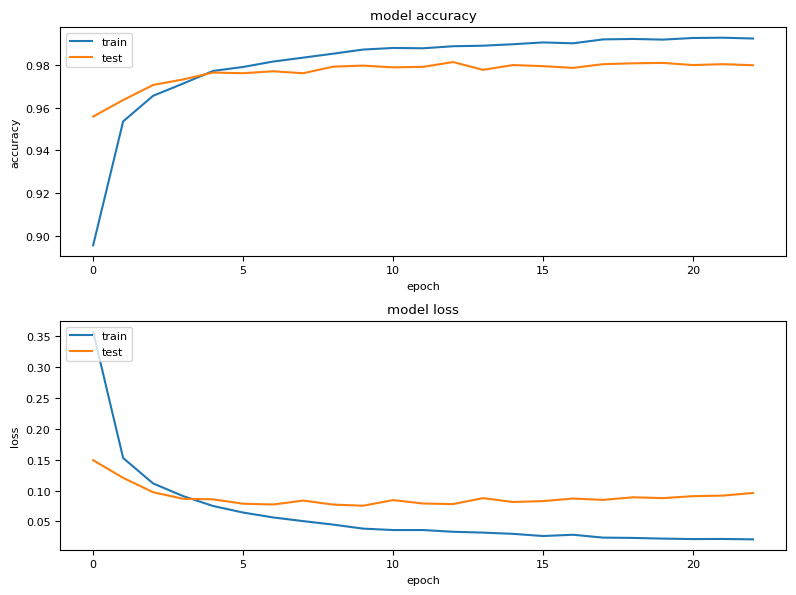

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot 1
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# Plot 2
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

plt.tight_layout()
plt.show()

In [22]:
# Bewertung des Modells
test_loss, test_acc = model2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

  1/313 [..............................] - ETA: 8s - loss: 0.1769 - accuracy: 0.9688

313/313 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9814
Test accuracy: 0.9814000129699707


How does the network actually know how to train? What does the network do to make better predictions? This is where the cost function comes into play.

### **Confusion Matrix**

The error matrix (also known as the confusion matrix) is a table that shows the performance of a classification model. It shows the number of correctly and incorrectly classified examples for each class.

The Confusion Matrix consists of four main components: True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN). TP are the correctly classified positive examples, TN are the correctly classified negative examples, FP are the examples falsely classified as positive and FN are the examples falsely classified as negative.

The Confusion Matrix allows us to derive various performance metrics, such as accuracy, precision, recall and F1 score. It also gives us insights into the type of errors the model makes and can help us improve the model's performance by analyzing the errors and making adjustments accordingly.

The Confusion Matrix is an important tool in the evaluation of classification models and helps us to understand and interpret the strengths and weaknesses of the model.

I would like to use them here to estimate where the model makes incorrect predictions. To do this, we first have to let the model make the predictions.

In [23]:
y_pred = model2.predict(x_test)
print(f"y_pred shape: {y_pred.shape}\n"
  f"y_test shape: {y_test.shape}")


313/313 [==============================] - 0s 1ms/step
y_pred shape: (10000, 10)
y_test shape: (10000, 10)


The data is still one-hot coded, which we can recognize from the second dimension of the shape. This means that we cannot yet create an error matrix. Let's recall what one of the $10000$ arrays looks like.

In [24]:
print(f"Array: {y_pred[1]}\n"
  f"Max. Wert: {np.max(y_pred[1])}\n"
  f"Stelle des Max. Wertes: {np.argmax(y_pred[1])}")

Array: [3.2379010e-14 1.3581311e-07 9.9999988e-01 2.2000996e-13 2.3804412e-24
 9.4921511e-15 2.6883244e-15 9.9379326e-13 2.8860154e-12 2.7027829e-22]
Max. Wert: 0.9999998807907104
Stelle des Max. Wertes: 2


For each of the 10 predictable digits, the array contains the probability that it is this particular digit.

In the example above, the model is very certain. The highest probability is given as $0.99999...\%$. The network is therefore more than $99.999..\$$ sure that this is the digit.
And this probability is in the second position in the array, so it represents the $3$.

I now apply this procedure to all data.


In [25]:
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)

Now the data has the correct format and I can create the error matrix.

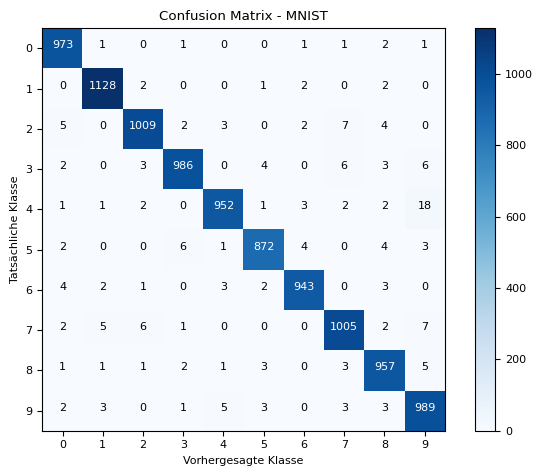

In [26]:
from sklearn.metrics import confusion_matrix

# Erstellen der Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Definiere die Klassenlabels
labels = np.arange(10)

# Plot der Confusion Matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - MNIST')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')

# Füge die Werte in die Matrix ein
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

What we can see from this graph... The correct number is plotted on the y-axis and the predicted number on the x-axis. If these values match, the numerator is incremented (on the diagonal). The higher the values on the diagonal, the better, because the model has predicted more correctly.

The fields around it indicate how often the network mistook a $2$ for a $5$, for example, which was $0$ in this case. Particularly high, compared to the other incorrectly predicted digits, seem to be the $18$ incorrect predictions for the $4$, which was mistaken by the neural network for a $9$. This seems plausible to me, as these digits - at least when I write them - often look very similar.

In this way, you can plausibilize to a certain extent what the neural network predicts.

So I have now shown you how to program the neural network. But what happens during training is the really exciting part. So let's move on to the training.

### **Training the neural network**

The neural network learns by adjusting its weights and bias values to improve the predictions. And it repeats this over and over again until the accuracy is sufficient or you have to stop the training because the model may not be complex enough. Training a neural network traditionally follows the following steps.

1. **Initialization**: The weights and bias values of the network are initialized randomly, often with a small normal distribution to promote more efficient convergence.
2. **Forward propagation**: The input data is passed through the network, using the activation functions and weights to compute the output of the network. Each layer of the network performs a linear transformation of the inputs and then applies a non-linear activation function such as the sigmoid, ReLU or tanh function.
3. **Error calculation**: The difference between the calculated output of the network and the actual output values is calculated using an error or cost function such as Mean Squared Error (MSE) for regressions or Crossentropy Error for classifications. This function measures the performance of the network and serves as the basis for adjusting the weights.
4. **Backpropagation**: The error is backpropagated through the network to calculate the gradient of the error function with respect to the weights and bias values. This is achieved using the chain rule of derivation by backpropagating the error from the output layer to the input layer. The gradient indicates how much the weights and bias values must change to reduce the error.
5. **Weight update**: An optimizer, such as gradient descent or its variants such as SGD, Adam or RMSprop, is used to update the weights and bias values based on the calculated gradient. The learning rate, which determines the size of the update steps, can be adjusted to control convergence and avoid overfitting.
6. **Repeat**: Steps 2-5 are repeated for a specified number of epochs or until a termination criterion is met. Typical termination criteria include reaching a certain level of accuracy on a validation dataset or failure to show significant improvement in performance over multiple epochs.

<figure>
    <img src="https://d1rwhvwstyk9gu.cloudfront.net/2018/11/Capture2-3.png", width="400">
    <figcaption>The interaction of backpropagation, gradient descent and optimizer should find the global miminum of the cost function. <a href="https://brilliant.org/wiki/backpropagation/">Image source</a>
  </figure>

In the following, I will first discuss a few of the cost functions. Then I will describe forward and backward propagation and the gradient descent method in more detail.
Finally, I will try my hand at a (numerical) example.
In another, subsequent article, I will deal with the optimizers.

#### **Forward propagation**

Forward propagation is the process by which input data flows through the neural network to generate a prediction. In each layer, the inputs are multiplied by the weights and the biasses are added together. The resulting sum is then run through an activation function such as the sigmoid function or the ReLU function to calculate the activations of the neurons. This process is repeated for each layer until the output is reached. In mathematical terms:

\begin{align*}
z^{(l)} &= W^{(l)} \cdot a^{(l-1)} + b^{(l)} \\
a^{(l)} &= f(z^{(l)})
\end{align*}

Here $z^{(l)}$ is the weighted sum of the inputs in layer $l$, $W^{(l)}$ are the weights, $a^{(l-1)}$ are the activations of the previous layer, $b^{(l)}$ are the biasses and $f()$ is the activation function.

##### **Error calculation: Cost functions**

In this section, I would like to mention a few of the most common cost functions.

**Mean Squared Error (MSE)**: The MSE function measures the mean squared error between the actual and expected outputs. It is often used in regression problems where the goal is to estimate a continuous output. The function calculates the squared difference between each actual and expected output and then takes the average over all examples. The MSE function is sensitive to outliers as the squared error increases sharply as the difference between the actual and expected values increases.

\begin{equation}
\nonumber
  MSE = \dfrac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

* **Mean Absolute Error (MAE)**: The MAE function measures the average absolute error between the actual and expected outputs. Unlike the MSE function, which considers the squared error, MAE considers the absolute error. This means that outliers in the data have less impact on costs than when using MSE. The MAE function is also useful in regression problems and is often used when it is important to understand the average error in the actual units of the output.

\begin{equation}
\nonumber
  MAE = \dfrac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation}

* **Binary Cross-Entropy**: Diese Funktion wird verwendet, wenn es sich um ein binäres Klassifikationsproblem handelt, bei dem die Ausgabe entweder 0 oder 1 ist. Die Funktion misst den Fehler zwischen den tatsächlichen und erwarteten Ausgaben, wobei die Ausgaben als Wahrscheinlichkeiten interpretiert werden. Sie verwendet die logarithmische Funktion, um den Fehler zu berechnen, wobei ein höherer Fehler auftritt, wenn die tatsächliche Ausgabe stark von der erwarteten Ausgabe abweicht. Die Binary Cross-Entropy-Funktion wird oft mit der Sigmoid-Aktivierungsfunktion in der Ausgabeschicht kombiniert.

\begin{equation}
\nonumber
  Binary Cross Entropy = -\dfrac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]
\end{equation}

* **Binary Cross-Entropy**: This function is used when it is a binary classification problem where the output is either 0 or 1. The function measures the error between the actual and expected outputs, interpreting the outputs as probabilities. It uses the logarithmic function to calculate the error, with a higher error occurring when the actual output differs greatly from the expected output. The Binary Cross-Entropy function is often combined with the Sigmoid activation function in the output layer.

\begin{equation}
\nonumber
  Categorical Cross Entropy = -\dfrac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{m} y_{ij} \log(\hat{y}_{ij})
\end{equation}

In the equations, $y$ and $\hat{y}_i$ represent the actual (ground truth) and predicted values or outputs of the model.

   * In regression contexts (such as MSE and MAE), $y$ represents the actual value of the target quantity (e.g. real prices in a price estimation model) and $\hat{y}_i$​ represents the values predicted by the model.
   * In Binary Cross Entropy loss, $y$ represents the actual class (either $0$ or $1$) and $\hat{y}_i$​ represents the probability that the model predicts that class.
   * In Categorical Cross Entropy loss, $y_{ij}$​ represents the probability that the model predicts example $i$ as class $j$, while $y_{ij}$​ is the actual probability that example $i$ is class $j$.

In all cases, $y$ is the ground truth value and $\hat{y}_i$​ is the model prediction.


##### **Backpropagation**

Backward propagation is the process of propagating the error back through the network to calculate the gradient of the error function in terms of weights and biases. The gradient is calculated using the chain rule of derivative and propagated from the output layer to the input layer. Expressed mathematically:

\begin{align*}
\delta^{(L)} &= \nabla_a E \odot f'(z^{(L)}) \\
\delta^{(l)} &= ((W^{(l+1)})^T \cdot \delta^{(l+1)}) \odot f'(z^{(l)})
\end{align*}

Here $\delta^{(L)}$ is the error in layer $l$, $\nabla_a E$ is the gradient of the error function with respect to the outputs, $f'(\cdot)$ is the derivative of the activation function, $z^ {(L)}$ is the weighted sum of the inputs in layer $l$ and $\odot$ represents the element-wise multiplication.

#### **Weight Update**

Weight updating is a crucial step in training neural networks. After the gradient of the error function with respect to the weights and biases is calculated, the weights and biases are updated based on this gradient and a learning rate $\alpha$. This is done to gradually minimize the error and adjust the model. The weight update is done by applying the gradient descent method:

1. The change in weights $\Delta W^{(l)}$ and bias $\Delta b^{(l)}$ is calculated by multiplying the negative gradient by the learning rate.
2. The weights and biases are updated according to the calculated change.
3. This process is repeated iteratively to minimize the error over multiple epochs and improve the model.

The learning rate influences the size of the update steps and is crucial for the convergence of the model. Too high a learning rate can lead to unstable or divergent solutions, while too low a learning rate can lead to slow convergence or local minima. Therefore, selecting an appropriate learning rate is crucial for training a neural network.

In a separate article I will use an example to show how the interaction works here.

#### Summary

<figure>
  <img src="https://poissonisfish.files.wordpress.com/2020/11/non-convex-optimization-we-utilize-stochastic-gradient-descent-to-find-a-local-optimum.jpg?w=475&h=316">
  <figcaption>Gradient descent method in 3-dimensional space. <a href="https://poissonisfish.com/2023/04/11/gradient-descent/">Bildquelle</a>
</figure>

The goal of the method described above, which combines backpropagation, Mean Squared Error (MSE) and Stochastic Gradient Descent (SGD), is to train a neural network to find a global minimum of the cost function in a high-dimensional space. By gradually adjusting the weights and bias values using the gradient descent method, the cost function is continuously minimized to achieve optimal performance of the network with respect to the given task. This process allows the network to learn complex patterns and relationships in the data and make precise predictions.

## Activation functions

Activation functions are also an important part of every artificial neural network. They determine how the network responds to certain inputs and contribute significantly to the performance and accuracy of an ANN. In this section, we will explore a few of the most commonly used activation functions in ANNs.

### Sigmoid function

The **sigmoid function** is often used in binary classification problems. The function uses an S-shaped curve that allows for a smooth overlap between classes. It provides an output value between 0 and 1. A disadvantage of the sigmoid function is that it is susceptible to the gradient vanishing problem if the weights become too large.

* **Sigmoid Gradient Vanishing** describes the phenomenon that individual gradients approach zero. This is because the derivative of the sigmoid function becomes very small for very large or very small inputs. If the gradient is close to zero, the ANN's training may be very slow or stopped because the gradient is needed to update the ANN's parameters. Solutions can be, for example, other activation functions, the ReLU or the use of methods such as gradient clipping or batch normalization.

A common use case for sigmoid activation functions is in binary classification problems where the model needs to make predictions that are either “true” or “false” (Is there a dog in the picture?).

The formula for the sigmoid activation function is:

   $f(x) = \dfrac{1}{1 + e^{-x}}$

Activation function and derivative are shown here.

<figure>
     <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*7XQVdpnz_QctgMkY1wivJg.png", width="500">
     <figcaption>Sigmoid activation function with derivative, image by author
   </figure>

### Rectified Linear Unit (ReLU)

The **ReLU (Rectified Linear Unit)** function is a linear function that returns zero for negative inputs and the entered value itself for positive inputs. Therefore, the ReLU function is particularly useful when it comes to learning non-linear functions. However, a disadvantage of the ReLU function is that it is susceptible to the dead neuron effect, where neurons that give a negative output are set to zero and can no longer be trained.

* The **Dying ReLU** problem describes the effect when a neuron in the ANN no longer outputs activation due to the activation function used and remains inactive for all subsequent layers of the neural network. This limitation may cause the ANN to stop functioning properly and degrade performance. Solutions to this problem can be, for example, the Leaky or Parametric ReLU activation function. These ensure that the neuron emits a small activation in response to negative inputs. Alternatively, you can initialize the ANN so that the weights do not become too negative.

The ReLU activation function is a common choice for deep learning problems that involve approximating functions that have nonlinear relationships. An example could be predicting the selling price of a home based on various characteristics such as size, location and age.

The formula for the ReLU activation function is:

   $f(x) = max(0, x)$

The ReLU function and its derivation can be represented graphically as follows:
  
<figure>
     <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*UJha_STDlixfPVGZ2EGEVA.png", width="500">
     <figcaption>ReLU activation function with derivation</figcaption>
   </figure>

### Tanh (Hyperbolic Tangent)

The Tanh function describes an S-shaped curve similar to the sigmoid function. However, it provides output values between -1 and 1, making it more suitable for problems where negative outputs are possible. However, a disadvantage of the Tanh function is that it is also prone to the vanishing gradient problem.

A common use case for the hyperbolic tangent activation function is in deep learning problems that involve approximating more complex functions than the ReLU function. An example could be predicting the movement of an object based on its speed and acceleration.

The formula for the hyperbolic tangent activation function is:

$f(x) = tanh(x)$

The hyperbolic tangent function and its derivative in a graph:

<figure>
     <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*c4Z6iIz0qWXgLqeQ1c1bWw.png", width="500">
     <figcaption>Tanh activation function with derivative</figcaption>
   </figure>

Tanh activation function with derivative, image by author
There are other activation functions used in artificial neural networks, but the ones mentioned above are some of the most common. Choosing the right activation function depends on the nature of the problem and the requirements of the model. It is important to take the time to understand and compare the different activation features to get the best possible performance for your problem.

## Types of neural networks

Neural networks can be divided into different types depending on their architecture and functionality. Each type has its own strengths and weaknesses and is optimized for specific applications. In this section we'll look at a few of the most common types.

### **Feedforward Networks**

Feedforward networks are the simplest type of neural networks and consist of an input layer, one or more hidden layers, and an output layer. Data flows in one direction through the network, from the input layer to the output layer. Feedforward networks are often used for classification tasks, such as recognizing handwritten digits.

<figure>
   <img src="https://tikz.net/wp-content/uploads/2021/12/neural_networks-006.png", width="700">
   <figcaption>A deep feedforward neural network. <a href="https://tikz.net/neural_networks/">Image source</a>
</figure>

### **Convolutional Neural Networks (CNN)**

CNNs specialize in processing images and are often used for image recognition tasks. They consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers apply filters to the input images and extract features. The pooling layers reduce the size of the feature maps. feature maps. Fully connected layers then classify the extracted features.

<figure>
   <img src="https://tikz.net/wp-content/uploads/2021/12/neural_networks-007.png", width="500">
   <figcaption>A deep convolutional neural network with different layers.<a href="https://tikz.net/neural_networks/">Image source</a>
</figure>

### **Recurrent Neural Networks (RNN)**

RNNs specialize in processing sequences, such as speech and time series. They have an internal memory function that allows them to store information from previous steps and use it in future steps. RNNs consist of one or more layers connected to recurrent neurons.

<figure>
   <img src="https://camo.githubusercontent.com/019182ee8a8510dbfc903cfe81fe783541bd4e123cf798365daf41dc0d4021bb/68747470733a2f2f6769746875622e636f6d2f44656 5704c6561726e696e674454552f30323435362d646565702d6c6561726e696e672d776974682d5079546f7263682f626c6f622f6d61737465722f73746174 69635f66696c65732f726e6e2d756e666f6c642e706e673f7261773d31", width="500">
   <figcaption>Gradient descent method in 3-dimensional space. <a href="https://github.com/CaptainE/RNN-LSTM-in-numpy/blob/master/RNN_LSTM_from_scratch.ipynb">Image source</a>
</figure>

### **Long Short-Term Memory (LSTM) Networks**

LSTMs are a type of RNNs that are particularly well suited for processing long sequences. They have a complex architecture that allows them to store and forget information over the long term. LSTM networks are widely used in speech recognition, word processing and translation.

<figure>
   <img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Mr9zEA72R-LdAHtnXyZ0Eg.png", width="500">
   <figcaption>Gradient descent method in 3-dimensional space. <a href="https://medium.com/ai%C2%B3-theory-practice-business/awd-lstm-6b2744e809c5">Image source</a>
</figure>

### **Physical Guided Neural Network (PGNNs)**

Another interesting concept is the PGNN, also known as Physical Informed Neural Network (PINN). PGNNs use physical laws and mathematical models to predict the behavior of a system. They are often used in numerical simulation and process optimization to speed up and optimize the design process. PGNNs require less training data than traditional machine learning models and can significantly reduce the cost and time of running experiments. They are used in fluid dynamics, materials science and engineering to simulate and optimize processes such as flow, heat transfer and mechanical loading.

<figure>
   <img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Hf1WUZdGN5ol_np475U72w.png", width="500">
   <figcaption>Gradient descent method in 3-dimensional space. <a href="https://en.wikipedia.org/wiki/Physics-informed_neural_networks">Image source</a>
</figure>

### **Autoencoder**

Autoencoders are a special type of neural network where the goal is to reconstruct the input data as accurately as possible. They consist of an encoder part, which maps the input data into a compressed latent space, and a decoder part, which transforms the data from this space back into the original input format.

<figure>
   <img src="https://tikz.net/wp-content/uploads/2021/12/neural_networks-008.png", width="550">
   <figcaption>An autoencoder network (encoder + decoder).<a href="https://tikz.net/neural_networks/">Image source</a>
</figure>

Depending on the application, different types of mesh can be used to achieve the best possible result.

## **Summary**

In this post I hope I was able to teach you something about Neural Networks: What is the **Hello World!** of machine learning? What does this so-called **MNIST** data set look like in detail? What is a confusion matrix and how do neural networks learn? What are cost functions, backpropagation, optimizers etc. etc.
I've also described a few of the activation functions and optimizers. I also showed a few types of neural networks.

If you have any questions or found errors, please contact me (or here in the comments if I have installed the function by then).

In future posts, I would like to describe individual topics such as optimizers in more detail.